# Process Data 1

Notebook with tools for analyzing, segmenting, and processing experimental data from force-sensing tensegrity.

Andrew Barkan
11/21/2019

In [91]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn as sk
import scipy as sp
from scipy import signal

Specify the experimental data you would like to load, and make sure this script has access to it.

In [92]:
# Change to reflect your working directory for the repo
data_filename = r"C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Data\test_2019_10_24\test_1\TEST10.csv"
#data_filename = r"/home/andrew/Documents/BEST/Tensegrity-HRI/Data/test_2019_11_19/test_1/TEST1A1.CSV"

raw_data = pd.read_csv(data_filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
# Remove indicator column
raw_data = raw_data.drop(columns = ["IND"])
raw_data.head()

,time,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,FSR_6,FSR_7,FSR_8,FSR_9,FSR_10,FSR_11,FSR_12,ACC_X,ACC_Y,ACC_Z
0,777173223,29,51,1,80,127,204,63,204,264,409,34,61,0.36,-1.72,9.68
1,777174224,29,54,2,78,127,201,66,202,266,409,32,65,0.36,-1.72,9.68
2,777175208,30,55,2,80,124,200,65,200,266,409,31,68,0.36,-1.72,9.68
3,777176208,29,56,2,79,130,204,66,204,263,406,33,61,0.36,-1.72,9.68
4,777177208,30,53,3,80,126,203,65,203,267,410,33,69,0.36,-1.72,9.68


In [93]:
# Convert from microsecs to seconds
raw_data["time"] = raw_data["time"].apply(lambda x: (x-raw_data["time"][0])*1e-6)
raw_data = raw_data.set_index("time")

In [94]:
# Split data into force and acceleration data
raw_fsr_data = raw_data[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                        "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]]

raw_acc_data = raw_data[["ACC_X", "ACC_Y", "ACC_Z"]]

In [95]:
# Reorder FSR data based on conventions
raw_fsr_data = raw_fsr_data[["FSR_9", "FSR_10", "FSR_2", "FSR_1", "FSR_5", "FSR_6", 
                             "FSR_7", "FSR_8", "FSR_12", "FSR_11", "FSR_4", "FSR_3"]]
raw_fsr_data.columns = ["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                        "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]

In [96]:
# Force divider function
def force_divider(x):
    k_outer = 3.738
    k_inner = 0.368
    dist = x/k_inner
    return (k_outer + k_inner)*dist

# FSR model function
def FSR_model(x):
    return 131.2*np.exp(0.7801*x)/1000

In [97]:
# Convert FSR signals to actual forces in N
fsr_data = raw_fsr_data[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                         "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]] = raw_fsr_data[[
    "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]].apply(
    lambda x: force_divider(FSR_model(x*(5/1023))), axis=1).copy()


fsr_data.head()

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,FSR_6,FSR_7,FSR_8,FSR_9,FSR_10,FSR_11,FSR_12
time,,,,,,,,,,,,
0.000000,4.005506,6.962417,1.778095,1.635029,2.375756,3.186431,1.861339,3.186431,1.847199,1.666498,1.985982,1.469470
0.001001,4.036167,6.962417,1.798550,1.635029,2.375756,3.150191,1.882752,3.162225,1.875587,1.653839,1.970896,1.475084
0.001985,4.036167,6.962417,1.805421,1.641275,2.348736,3.138203,1.875587,3.138203,1.897164,1.647545,1.985982,1.475084
0.002985,3.990263,6.883232,1.812317,1.635029,2.403087,3.186431,1.882752,3.186431,1.847199,1.660156,1.978425,1.475084
0.003985,4.051586,6.989014,1.791705,1.641275,2.366715,3.174305,1.875587,3.174305,1.904411,1.660156,1.985982,1.480719


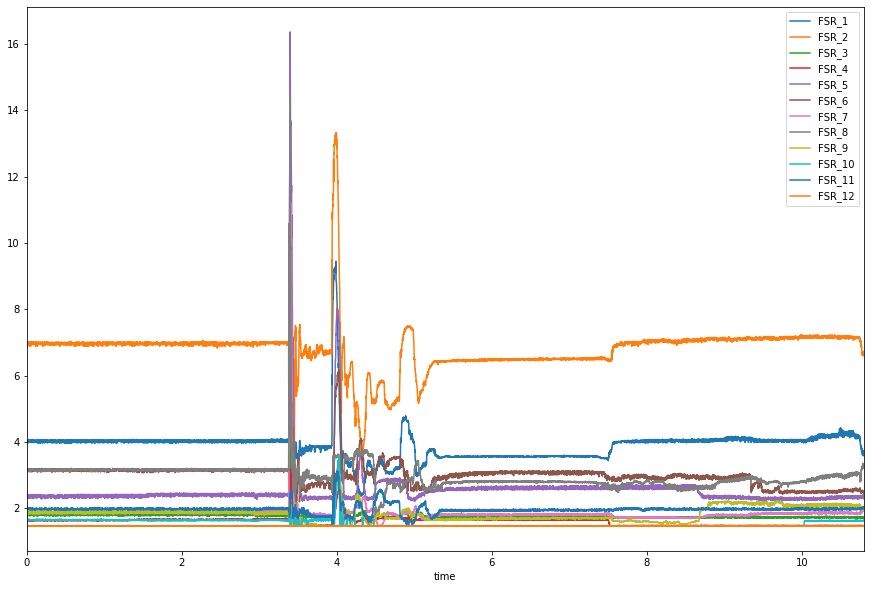

In [98]:
# An example plot of force data over time
fsr_data.plot(figsize=(15,10))

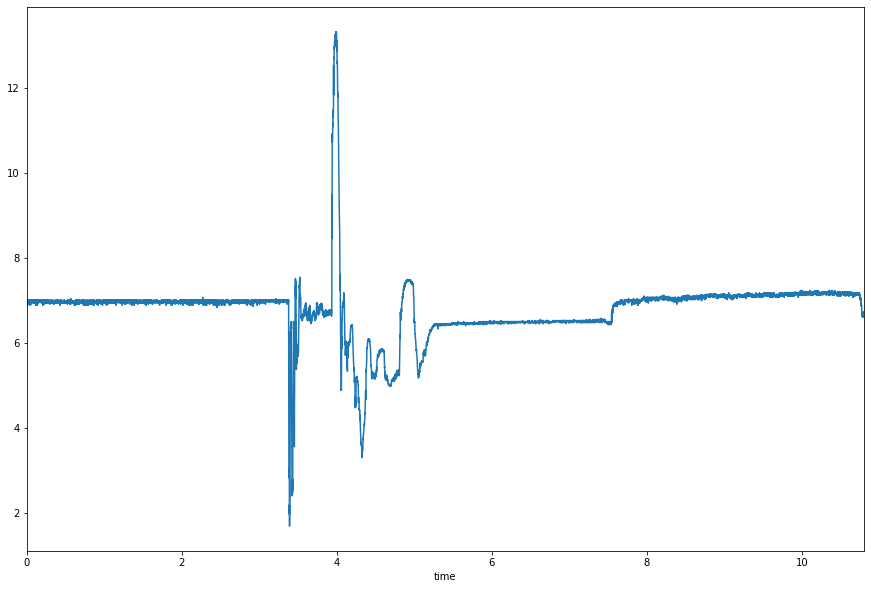

In [99]:
fsr_data["FSR_2"].plot(figsize=(15,10))

In [100]:
# Attempt to take a filtered derivative
dydx = signal.savgol_filter(fsr_data["FSR_2"].values, 101, 2, deriv=1, delta=0.001)

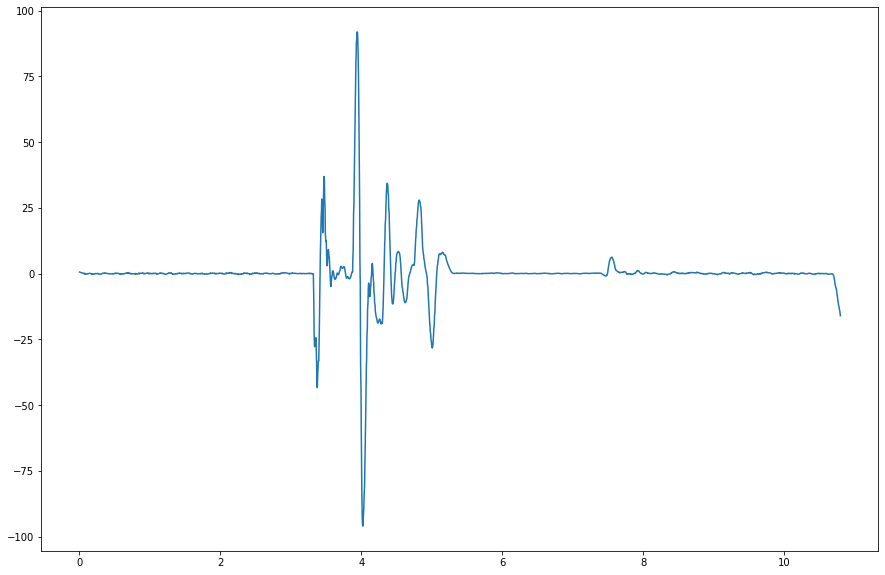

In [101]:
figure(figsize=(15, 10))
plt.plot(fsr_data.index.values, dydx)
#plt.plot(fsr_data.index.values, fsr_data["FSR_2"].values)

In [ ]:
fsr_data.head()